## Sean Kerr Week 12

In [39]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")


import numpy as np
import pandas as pd
import thinkstats2
import thinkplot
import statsmodels.formula.api as smf

In [44]:
df = pd.read_csv("C:/Users/Sean/Desktop/Gradschool/api_bruh.csv")

array([[<AxesSubplot:title={'center':'SUP.Gold.Earned'}>,
        <AxesSubplot:title={'center':'sup_cs10'}>],
       [<AxesSubplot:title={'center':'Adc.Gold.Earned'}>,
        <AxesSubplot:title={'center':'adc_cs10'}>]], dtype=object)

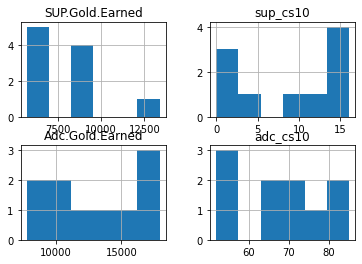

In [11]:
df.hist(bins = 6)

In [12]:
df.describe()

,SUP.Gold.Earned,sup_cs10,Adc.Gold.Earned,adc_cs10
count,10.000000,10.000000,10.00000,10.000000
mean,8181.200000,8.700000,12862.90000,67.600000
std,2300.746198,6.342975,3605.09992,11.730303
min,5723.000000,0.000000,7847.00000,52.000000
25%,6499.500000,2.750000,10178.75000,57.500000
50%,7754.500000,9.500000,13290.50000,67.500000
75%,9251.000000,14.000000,15972.25000,73.500000
max,13372.000000,16.000000,17898.00000,85.000000


In [13]:
df_low = df[df["sup_cs10"] <= 5]
df_high = df[df["sup_cs10"] > 5]

In [15]:
pmf_low = thinkstats2.Pmf(df_low["Did.Win"])
pmf_high = thinkstats2.Pmf(df_high["Did.Win"])

In [17]:
print(pmf_low)
print(pmf_high)

Pmf({True: 0.75, False: 0.25})
Pmf({False: 0.6666666666666666, True: 0.3333333333333333})


In [20]:
cdf = thinkstats2.Cdf(df["sup_cs10"])

In [21]:
print(cdf)

Cdf([ 0  1  2  5  8 11 14 16], [0.1 0.2 0.3 0.4 0.5 0.6 0.8 1. ])


{'xscale': 'linear', 'yscale': 'linear'}

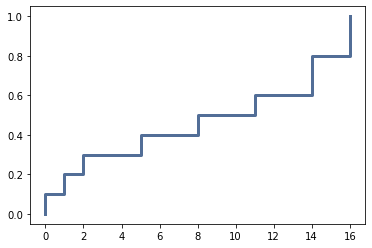

In [22]:
thinkplot.Cdf(cdf)

<AxesSubplot:xlabel='SUP.Gold.Earned', ylabel='Adc.Gold.Earned'>

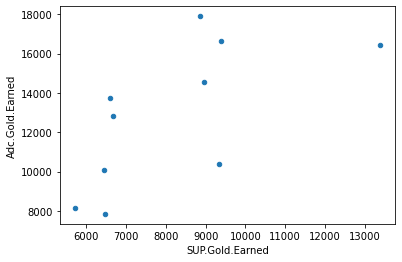

In [23]:
df.plot.scatter(x = "SUP.Gold.Earned", y = "Adc.Gold.Earned")

<AxesSubplot:xlabel='sup_cs10', ylabel='adc_cs10'>

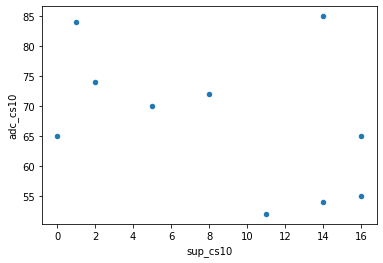

In [24]:
df.plot.scatter(x = "sup_cs10", y = "adc_cs10")

In [25]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [38]:
df_sub = df[["sup_cs10", "Did_Win"]]
data = df_sub.sup_cs10.values, df_sub.Did_Win.values
ht = CorrelationPermute(data)
print(ht.PValue())
print(ht.actual)
print(ht.MaxTestStat())

0.097
0.5484028176193346
0.9140046960322245


In [46]:
n = len(df["Did_Win"])
win_num = []
for val in df["Did_Win"]:
    if val:
        win_num.append(1)
    else:
        win_num.append(0)

In [47]:
dw_sub = df[["sup_cs10", "adc_cs10"]]
dw_sub["Win"] = win_num 

model = smf.logit("Win ~ sup_cs10 + adc_cs10", data = dw_sub)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.529364
         Iterations 6


C:\Users\Sean\AppData\Local\Temp/ipykernel_3816/2051689524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dw_sub["Win"] = win_num


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Win   No. Observations:                   10
Model:                          Logit   Df Residuals:                        7
Method:                           MLE   Df Model:                            2
Date:                Fri, 03 Jun 2022   Pseudo R-squ.:                  0.2363
Time:                        20:29:28   Log-Likelihood:                -5.2936
converged:                       True   LL-Null:                       -6.9315
Covariance Type:            nonrobust   LLR p-value:                    0.1944
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4121      5.805      0.416      0.678      -8.966      13.790
sup_cs10      -0.2230      0.153     -1.457      0.145      -0.523       0.077
adc_cs10      -0.0066      0.075     -0.088      0.930      -0.153       0.140
==============================================================================
"""